# Проект. "Исследовательский анализ рынка заведений общественного питания Москвы."

- Автор: Спектор Н.Ю.
- Дата: 09.02.2025

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

Цель: провести исследовательский анализ рынка заведений общественного питания Москвы.

Задачи:выявить наиболее популярные типы заведений, наилучшее расположение и подходящую ценовую категорию исходя из имеющихся данных. На основе этого анализа дать рекомендации заказчику, какой тип заведения, местоположение и ценовую категорию им выбрать для заведения общественного питания.

### Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---
1) Проверить данные на корректность и объединить 2 датасета;



2) Предобработать данные: привести названия столбцов к "змеиному регистру", обнаружить и предобработать пропуски, сделать корректными типы данных, проверить данные на явные и неявные дубликаты.


3) Провести исследовательский анализ данных:


- Исследовать количество объектов по каждой категории;

- Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

- Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

- Исследовать количество посадочных мест в заведениях.

- Исследовать рейтинг заведений.

- Построить матрицу корреляции рейтинга заведения с разными данными и выявить, какие из этих данных наибольшим образом влияют на рейтинг.

- Найти топ-15 популярных сетей в Москве.

- Изучить вариацию среднего чека заведения в зависимости от района Москвы.


4) Сформировать итоговый вывод и рекомендации.


5) Перезапустить ядро и выполнить все ячейки кода с помощью команд Kernel → Restart & Run All. Убедиться, что все ячейки корректно отработали.

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [84]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

import pandas as pd

In [85]:
# Используйте ячейки типа Code для вашего кода

import matplotlib.pyplot as plt 

In [86]:
# При необходимости добавьте новые ячейки для кода или удалите пустые
import seaborn as sns

- Познакомьтесь с данными и изучите общую информацию о них.

In [87]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [88]:
from phik import phik_matrix

In [89]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [90]:
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

In [91]:
rest_info.info()

rest_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [92]:
rest_price.info()
rest_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


# Промежуточный вывод


Датасет rest_info содержит информацию с 9 столбцами и 8406 колонками. 6 столбцов объектного типа и 3 - числового. Все типы столбцов соответствуют своим названиям. Названия столбцов уже написаны в "змеином формате". Пропуски присутсвиуют в двух столбцах - часы и сидинья. При чем если в часах пропусков относительно немного, то в сиденьях их почти половина.

Датасет rest_price содержит информацию с 5 столбцами и 4058 колонками. 3 столбца объектного типа и 2 - числового. Все типы столбцов соответствуют своим названиям. Названия столбцов уже написаны в "змеином формате". Пропуски присутсвиуют во всех столбцах кроме id. Особенно много пропусков в столбце с оценкой одной чашки капуччино. В остальных столбцах пропусков относительно немного. 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [93]:
#Для начала проверим данные в датасете rest_price:

rest_price.isna().sum()

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [94]:
rest_price.isna().sum()/rest_price.shape[0]

id                   0.000000
price                0.183095
avg_bill             0.059635
middle_avg_bill      0.224002
middle_coffee_cup    0.868162
dtype: float64

Пропусков во втором датасете не так уж много (кроме middle_coffee_cup) относительно этого датасета и скорее всего связаны с остутсвием информации. Все данные можно оставить как есть, не удаляя и не заменяя пропуски.

In [95]:
#Теперь можно объединить датасеты:
df = rest_info.merge(rest_price, on='id', how='left')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [97]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

В целом данные представлены корректно. Можно лишь преобразовать целочисленные типы данных, чтобы они не занимали слишком много места. Такие данные есть только в столбце 'chain'. Также можно преобразовать к целочисленному типу данных столбце 'seats'.

In [98]:
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer')

In [99]:
df['seats'] = pd.to_numeric(df['seats'], downcast = 'integer')

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [100]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [101]:
df.isna().sum()/df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Из первого датафрейма пропуски встречаются в двух столбцах - hours и seats. Пропуски в hours незначительны и составляют всего 6%. Скорее всего владельцы просто не указали часы работы данных заведений, поэтому можно их оставить как есть. Пропуски в seats могут быть связаны с тем, что в этих заведениях есть летние вернады и поэтому количество посадочных мест там менятеся в зависимости от сезонности. Пропуски в этой категории также лучше оставить как есть.

Причину пропусков в middle_avg_bill/middle_coffee_cup можно связать с тем, что это результат парсинга столбца avg_bill.

Для понимания количества пропусков в столбцах построим сотрировку данных.

In [102]:
pd.DataFrame(df.isna().sum()/df.shape[0]).style.background_gradient(cmap='coolwarm', axis=0)

,0
id,0.000000
name,0.000000
category,0.000000
address,0.000000
district,0.000000
hours,0.063764
rating,0.000000
chain,0.000000
seats,0.429574
price,0.605639


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [103]:
 df.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [104]:
#Чтобы проверть неявные дубликаты в имене и адресах приведем их нижнему регистру
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [105]:
#Проверим дубликаты по этим двум значениям:
df[['address', 'name']].duplicated().sum()

4

In [106]:
# код ревьюера
df[df[['address', 'name']].duplicated(keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


In [107]:
#Уудаляем дубликаты и создаем для этого новый датасет
df_new = df.drop_duplicates(subset=['address', 'name'],keep='first')

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [108]:
def  full_time_job(x):
    if x=='ежедневно, круглосуточно':
        return True
    else: 
        return False  

In [112]:
df_new = df_new.copy()
df_new['is_24_7'] = df_new['hours'].apply(full_time_job)

df_new.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


In [113]:
display(df_new['is_24_7'].value_counts())

False    7672
True      730
Name: is_24_7, dtype: int64

Как мы видим, круглосуточных заведений примерно 10% из всей выборки.

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

In [114]:
df = df.reset_index()

In [115]:
df.shape[0] - df_new.shape[0]

4

In [116]:
100 - (df_new.shape[0]/df.shape[0]*100)

0.0475850582917019

В ходе поисков дубликатов было найдено 4 неявных дубликатов по адресу и названию. Это чуть меньше 0,05% от всего массива данных. Также были заменены пропуски в столбцах "middle_avg_bill" и "hours" на медианные значения. Данные в столбце "chain" были приведены к менее массивным данным. А в столбце 'seats' - к целочисленным данным.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [117]:
category_groups = df_new.groupby('category')['id'].count()

<AxesSubplot:title={'center':'Количество объектов общественного питания по категориям'}, xlabel='Категория', ylabel='Количество'>

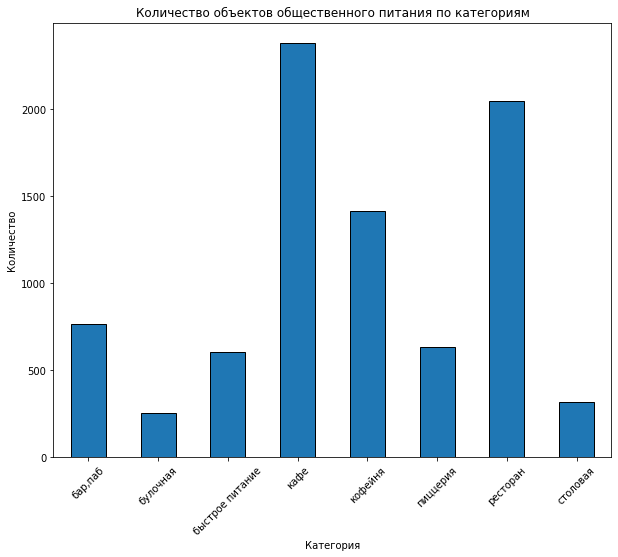

In [118]:
category_groups.plot(kind='bar', figsize=(10,8), title='Количество объектов общественного питания по категориям', edgecolor='black', 
                     xlabel='Категория', ylabel='Количество', rot=45)

В Москве больше всего кафе и ресторанов. И того и другого более 2000. Меньше всего столовых и булочных. Их меньше 500 на каждую категорию. На третьем месте по популярности выделяются кофейни. Их чуть менее 1500 штук.

In [119]:
#Пробуем вычислить долю по значениям, но код почему-то не работает
category_groups_procent = df_new['category'].value_counts(normalize=True)

<AxesSubplot:title={'center':'Процент объектов общественного питания по категориям'}, xlabel='Категория', ylabel='Процент'>

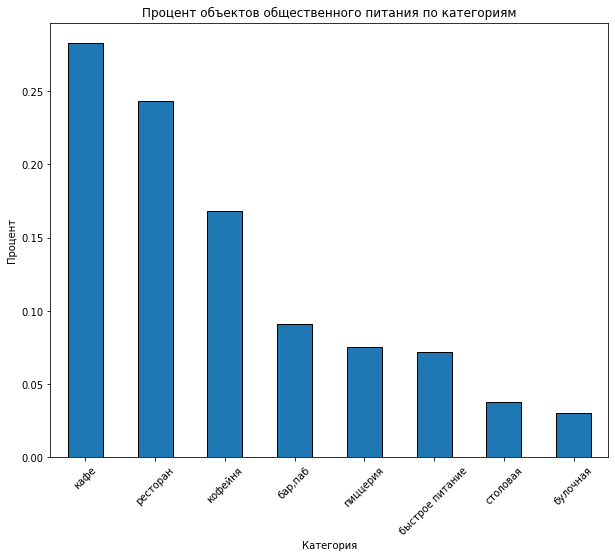

In [120]:
category_groups_procent.plot(kind='bar', figsize=(10,8), title='Процент объектов общественного питания по категориям', edgecolor='black', 
                     xlabel='Категория', ylabel='Процент', rot=45)

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [121]:
district_groups = df_new.groupby('district')['id'].count()

<AxesSubplot:title={'center':'количество объектов общественного питания по округам'}, ylabel='округ'>

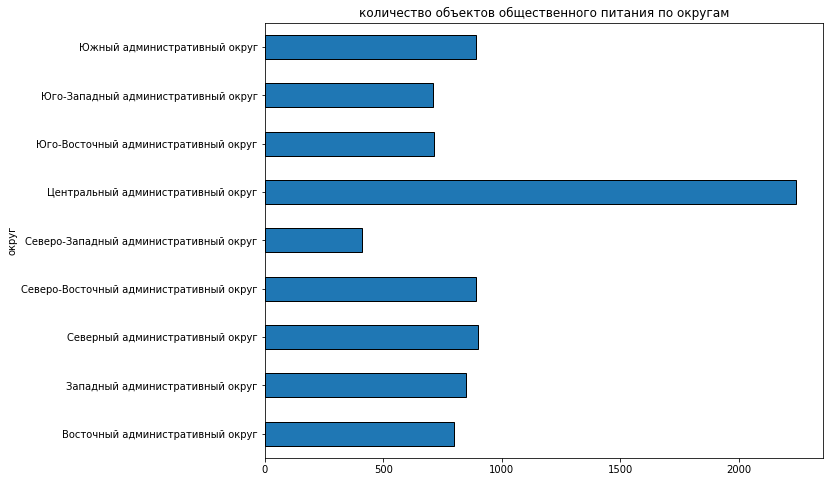

In [122]:
district_groups.plot(kind='barh', figsize=(10,8), title='количество объектов общественного питания по округам', edgecolor='black', 
                     xlabel='округ', ylabel='количество', rot=0)

Судя по графику по количеству объектов общественного питания по округам явно лидирует Центральный. Там их более 2000. Значительно меньше в сравнении с остальными округами количество заведений в Северо-западном округе. Их там около 500. Распределение по остальным округам достаточно равномерное и находится в пределах от 750 до 1000.

In [123]:
central_district = df_new[df_new['district']=='Центральный административный округ']

In [124]:
central_district_categories = central_district['category'].value_counts()

<AxesSubplot:title={'center':'Количество объектов общественного питания по категориям в ЦАО'}, xlabel='Категория', ylabel='Количество'>

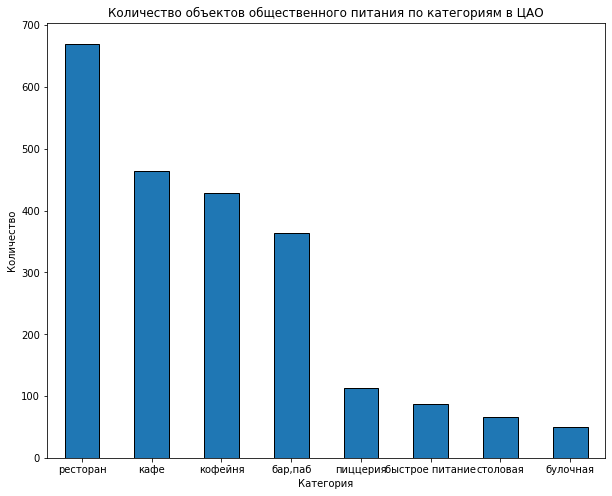

In [125]:
central_district_categories.plot(kind='bar', figsize=(10,8),
                                 title='Количество объектов общественного питания по категориям в ЦАО', 
                                 edgecolor='black', xlabel='Категория', ylabel='Количество', rot=0)

Проанализировав распредление по категориям в самом популярном по числу заведений Центральном округе, сделаем вывод, что самая популярная категория в этом округе - рестораны. Их здесь более 650. Меньше всего здесь булочных и столовых - около 50 на каждую категорию. Заведений быстрого питания и пиццерий тоже немного - около 100 на каждую категорию. Количество заведений по остальным категориям в ЦАО варьируются от 350 до 450 штук внутри каждой категории.

Для лучшего сравнения выведим аналогичные результаты, но по всем округам кроме ЦАО.

In [126]:
not_central_district = df_new[df_new['district']!='Центральный административный округ']

In [127]:
not_central_district_categories = not_central_district['category'].value_counts()

<AxesSubplot:title={'center':'Количество объектов общественного питания по категориям без ЦАО'}, xlabel='Категория', ylabel='Количество'>

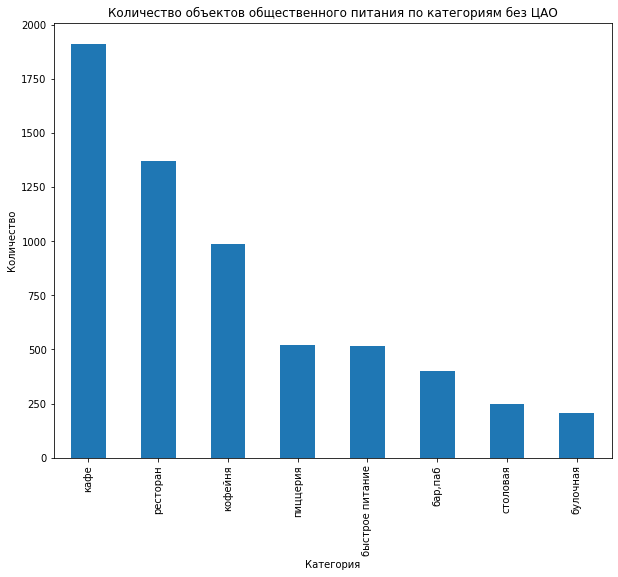

In [128]:
not_central_district_categories.plot(kind='bar', figsize=(10,8),
                                    title='Количество объектов общественного питания по категориям без ЦАО', 
                                    xlabel='Категория', ylabel='Количество')

По сравнению с ЦАО самая популярная категория в остальных округах - кафе, которая лидирует со значительным отрывом от сотальных. На втором месте - рестораны. Но на последних тоже булочные и столовые.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [129]:
df_new['chain_new']=df_new['chain'].replace({1:'Сетевые', 0: 'Несетевые'})

In [130]:
df_unstack = df_new.groupby('category')['chain_new'].value_counts(normalize=True).unstack(fill_value=0)

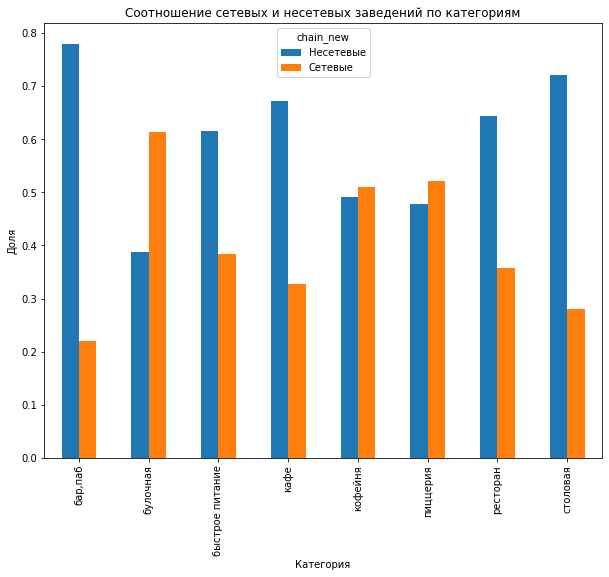

In [131]:
ax = df_unstack.plot(kind='bar', figsize=(10,8), title='Соотношение сетевых и несетевых заведений по категориям',
                xlabel='Категория', ylabel='Доля')

Распределение несетевых заведений по категориям гораздо больше. За исключением пиццерий и кофейн, где эти соотношения примерно равны, но доля сетевых чуть больше и в булочных, где доля сетевых значительно выше.

P.S. Не получается нанести цифры на график. Метод annot=True не работает. Вместо единички и нуля на легенде не получается вывести сетевой/несетевой (не знаю, как это сделать).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


Text(0.5, 1.0, 'Распределение количества посадочных мест в заведениях')

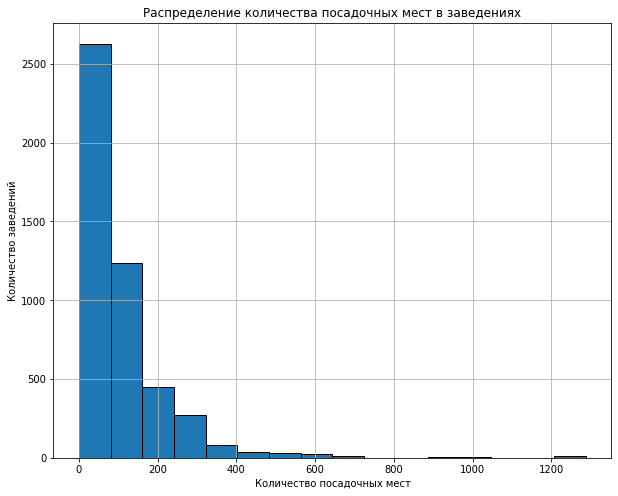

In [132]:
df_new.hist(column='seats', bins=16, edgecolor='black', figsize=(10,8))
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.title('Распределение количества посадочных мест в заведениях')

По гистограмме видно крайне неравномерное распределение сидячих мест по ресторанам и сильное смещение в область с низкими значениями.

Text(0, 0.5, 'Посадочные места')

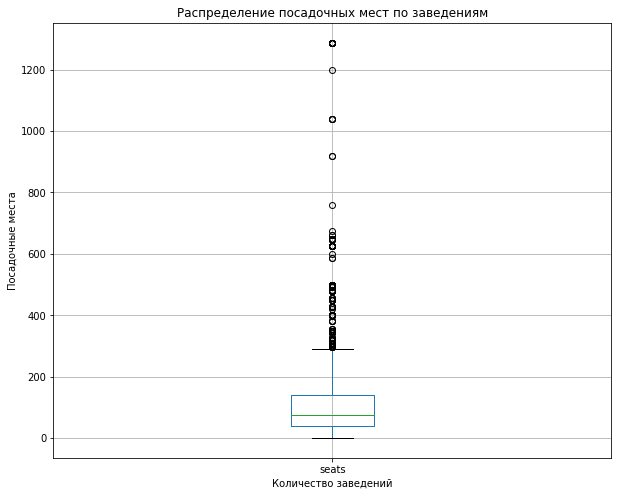

In [133]:
df_new.boxplot(column='seats', figsize=(10,8))
plt.title('Распределение посадочных мест по заведениям')
plt.xlabel('Количество заведений') 
plt.ylabel('Посадочные места')

Диаграмма размаха говорит о том, что большая часть заведений располагает посадочными местами в диапазоне от 50 до 100 мест, а основная часть варьируется в промежутке от 0 до 300 посадочных мест. Также в выборке очень много выбросов с высокими значениями. Самый высокий из которых имеет значение более 1300.

In [134]:
#Проверяем нулевые значения в выборке:
df_new.loc[df_new['seats']==0]['seats'].value_counts()

0.0    136
Name: seats, dtype: int64

Нулевых значений аж целых 136. Есть гипотеза, что это не ошибка. Просто подобные заведения работают только навынос.

In [135]:
#Проверяем значения на более чем 750 посадочных мест в выборке:
df_new.loc[df_new['seats']>750]['seats'].value_counts()

1288.0    11
1040.0     4
920.0      2
1200.0     1
760.0      1
Name: seats, dtype: int64

Подобных заведений не так много. Делаем предположение, что эти данные так же не ошибочны.

In [136]:
df_new['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

По первичному анализу видно, что данные крайне неравномерны. Среднее значение (108) и медиана (75) сильно различаются, что может свидетельствовать о большом количестве выбросов. Стандартное отклонение также велико. Так как в данных присутствует явные выбросы, то стоит использовать медиану для визуализации. Для начала построим диаграмму распределения для лучшего понимания ситуации.

Text(0, 0.5, 'Категории заведений')

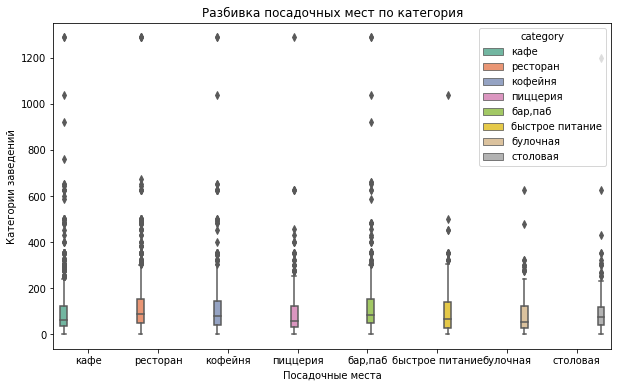

In [137]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='category', y='seats', hue='category', palette='Set2')
plt.title('Разбивка посадочных мест по категория')
plt.xlabel('Посадочные места') 
plt.ylabel('Категории заведений')

По диаграмме распределения видно, что выбросы по количеству посадочных мест встречаются во всех категориях заведений. Особенно существенны они в кафе и барах. Меньшие значения присутствуют в заведениях быстрого питания, пиццериях и булочных. Но самих выбросов много везде.

In [138]:
category_by_seats = df_new.groupby('category')['seats'].median()

<AxesSubplot:title={'center':'Распределение количества посадочных мест по категориям'}, xlabel='Категория', ylabel='Количество посадочных мест'>

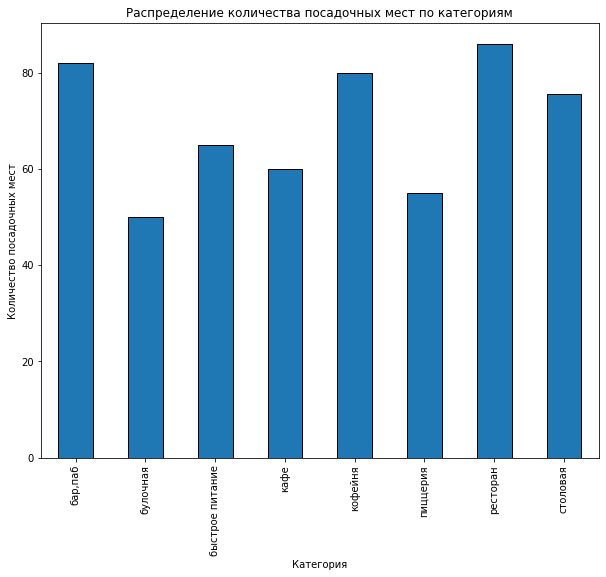

In [139]:
category_by_seats.plot(kind='bar', edgecolor='black', figsize=(10,8),
                       title='Распределение количества посадочных мест по категориям',
                       xlabel='Категория',
                       ylabel='Количество посадочных мест')

По распределению посадочных мест по категориям видна довольно ровная картина. Больше всего посадочных мест у ресторанов - более 80, примерно столько же у баров. Меньше всего у булочных и пиццерий - порядка 50 на каждую категорию.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [140]:
rating_by_category = df_new.groupby('category')['rating'].mean()

(4.0, 4.5)

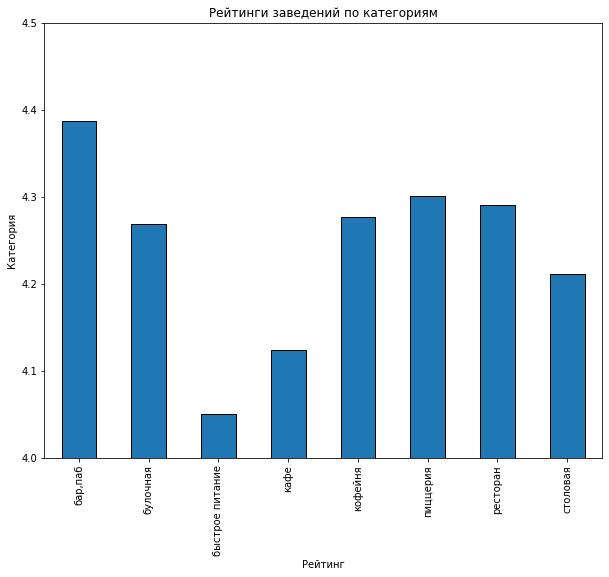

In [141]:
#При визуализации сделаем пороговые параметры оси y от 4 до 4,5, чтобы лучше было видно распределение:
rating_by_category.plot(kind='bar', edgecolor='black', figsize=(10,8), title='Рейтинги заведений по категориям',
                        xlabel='Рейтинг', ylabel='Категория')

plt.ylim(4, 4.5)

В целом рейтинги внутри категорий варьируются в не особо больших амплитудах - от примерно 4,05 до примерно 4,38. Самый высокий рейтинг у баров - 4,38. Это логично, ведь там люди выпивают и в хорошем расположении духа охотнее ставят заведению высокую оценку. Самый низкий у заведений быстрого питания (4,05) и у кафе (4,12). Что тоже логично, ведь подобные заведения относятся к более дешевым и, следовательно, их качество значительно уступает. Людям свойственно критическое отношение несмотря на желание сэкономить. У остальных категорий заведений рейтинг примерно одинаковый и варьируется в пределах от 4,22 до 4,3.

Раз ничего интересного мы тут не нашли, то добавим дополнительную группировку в разбивке по округам.

In [142]:
df_new.groupby('district')['rating'].mean()

district
Восточный административный округ           4.174185
Западный административный округ            4.181647
Северный административный округ            4.240980
Северо-Восточный административный округ    4.147978
Северо-Западный административный округ     4.208802
Центральный административный округ         4.377520
Юго-Восточный административный округ       4.101120
Юго-Западный административный округ        4.172920
Южный административный округ               4.184417
Name: rating, dtype: float64

Как видно, здесь тоже разбивка несущественна. Разве что в ЦАО оценки явно чуть выше, но незначительно.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [144]:
price_order = pd.CategoricalDtype(  
    categories=['выше среднего', 'средние', 'высокие', 'низкие'],   
    ordered=True  
) 

In [145]:
correlation_matrix = df_new[['category', 'district', 'chain','seats','price','is_24_7','rating']].phik_matrix()

interval columns not set, guessing: ['chain', 'seats', 'rating']


In [146]:
correlation_matrix.loc[correlation_matrix.index!='rating'][['rating']].sort_values(by='rating', ascending=False)

,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


В целом мы наблюдаем довольно низкую взаимосвязь между рейтингами и прочими рассмотренными категориями. Наибольшую зависимость рейтинга показывают такие параметры как категория цены, район и категория заведения (коэффициент корреляции - от 0,19 до 0,22). Наименьшую - количество посадочных мест. Здесь коэффициент корреляции близок к нулю. Отразим это на тепловой карте для лучшей цифровизации.

In [147]:
data_heatmap = correlation_matrix.loc[correlation_matrix.index!='rating'][['rating']].sort_values(by='rating', ascending=False)

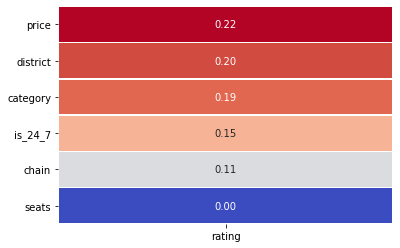

In [148]:
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )
plt.show()

Для проверки низкого уровня взаимосвязи проверим одну из сильнейших связей - месторапсоложение с помощью диаграммы рассеяния.

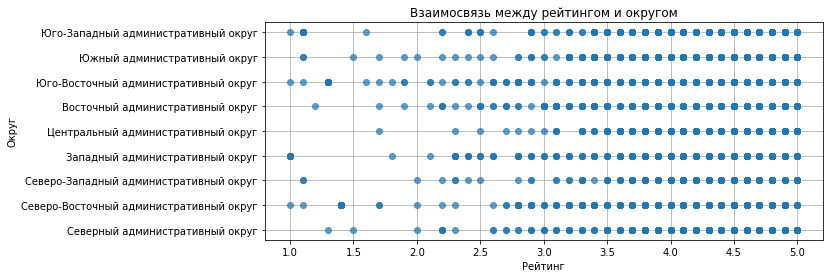

In [149]:
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df_new['rating'],
         df_new['district'],
         marker='o', 
         linestyle='',
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между рейтингом и округом')
plt.xlabel('Рейтинг')
plt.ylabel('Округ')
plt.grid()

На диаграмме рассеяния видно, что эти 2 категории данных практически не связаны друг с другом.

Однако самая высокая связь у нас с price. Построим гистограмму для количества посадочных мест из, сделав разбивку по уровню цен.


Text(0, 0.5, 'Количество заведений')

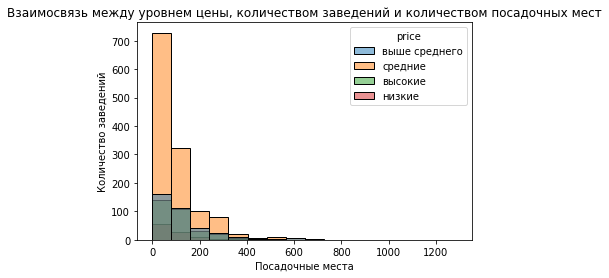

In [150]:
import seaborn as sns

sns.histplot(data=df_new, x='seats', hue='price', bins=16)
plt.title('Взаимосвязь между уровнем цены, количеством заведений и количеством посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Количество заведений')

График не имеет особой смысловой нагрузки. Разве что видно, что количество заведений со среднем уровнем цены явно выше во всех заведениях вне зависимости от количества посадочных мест.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [151]:
df_new_new = df_new.loc[df_new['chain']==True]

In [152]:
#Выберем топ-15 заведений по заданным параметрам. Также оставим их категории и средние значения рейтингов.
top_15 = df_new_new.groupby(['name', 'category']).agg(
    {'rating': 'mean', 'chain': 'sum'}
).sort_values(by='chain', ascending=False).head(15)

<AxesSubplot:title={'center':'Топ-15 популярных сетей в Москве'}, ylabel='Название'>

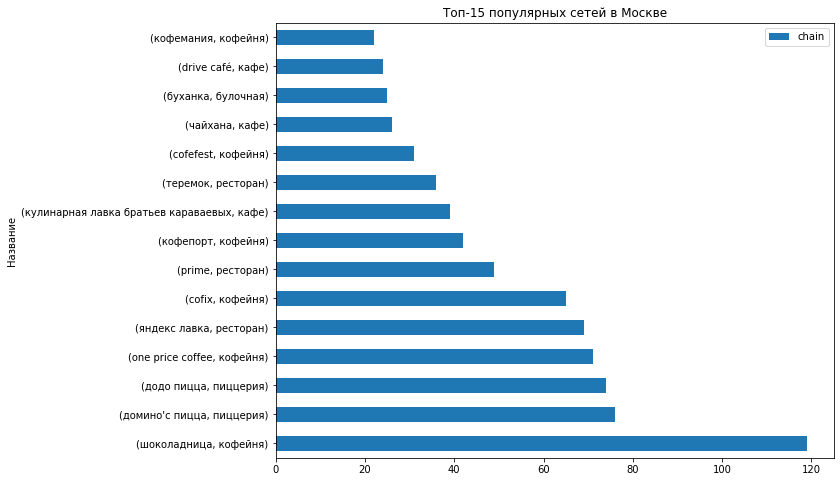

In [153]:
top_15.plot(kind='barh', figsize=(10,8), title='Топ-15 популярных сетей в Москве', 
            y='chain', xlabel='Название', ylabel='Количество заведений')

Самое популярное сетевое заведение в выборке - Шоколадница, относящееся к категории кофейня. Число таких заведений сильно лидирует на фоне остальных. Их в Москве чуть меньше 120. Тогда как второе заведение в списке топ-15 - пиццерия "Домино'с пицца" насчитывает менее 80 мест. В целом большинство мест из списка относятся к категориям кофейн или ресторанов. Присутствует пара пиццерий, 3 кафе и одна булочная.

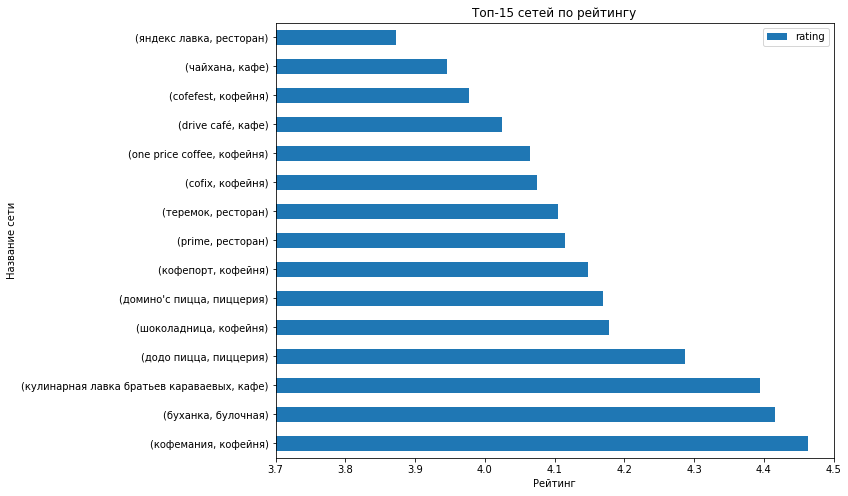

In [154]:
# Сортировка DataFrame по убыванию значений столбца 'rating'
top_15_sorted = top_15.sort_values(by='rating', ascending=False)

# Построение графика на основе отсортированных данных
top_15_sorted.plot(kind='barh', figsize=(10,8), y='rating')
plt.xlabel('Рейтинг')
plt.ylabel('Название сети')
plt.title('Топ-15 сетей по рейтингу')
plt.xlim(3.7, 4.5)
plt.show()

Рейтинг топ-15 сетевых заведений варьируется в значениях от 3,9 до примерно 4,4. Явный лидер здесь как и в количестве заведений - Кофемания (4,4). Также более высокие рейтинги на фоне остальных показывают булочная "Буханка" и кафе "Кулинарная лавка братьев Караваевых" (тоже примерно 4,4). Самый низкие рейтинги у кафе Чайхана" (4) и у ресторана "Яндекс лавка" (3,9) (кстати, странно, что "Яндекс лавка" попала в категорию ресторанов, когда логичнее было бы ее отнести к заведениям быстрого питания).

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [155]:
#Изучим данные столбца 'middle_avg_bill' на выбросы
df_new['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Расзождения в медиане и в среднем значении очень велико, также велико значение стандартного отклонения. Значит в выборке много выбросов. Изучим, где именно присутствует выбросы. Для этого построим диаграммы размаха.

Text(0.5, 1.0, 'Распределение среднего чека')

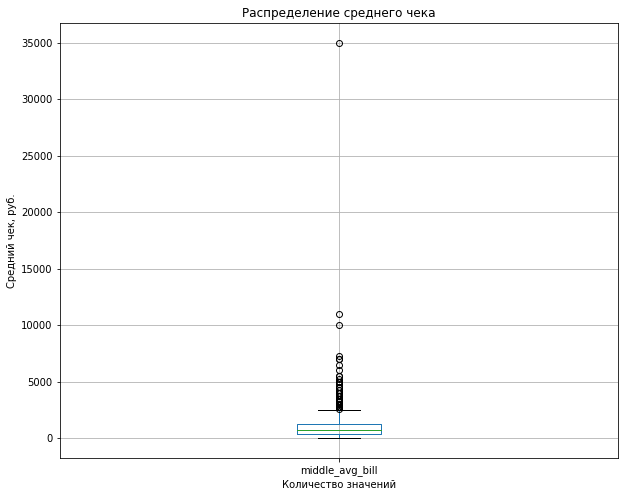

In [156]:
df_new.boxplot(column='middle_avg_bill', figsize=(10,8))
plt.xlabel('Количество значений')
plt.ylabel('Средний чек, руб.')
plt.title('Распределение среднего чека')

Видно, что выбросов очень много, но за пределами значений после 10000 выбросов немного. Значит можно убрать выбросы, чтобы значения для анализа среднего чека по округам.

In [157]:
df_new['district_new']=df_new['district'].str.replace('административный округ', ' ')

Text(0, 0.5, 'Посадочные места')

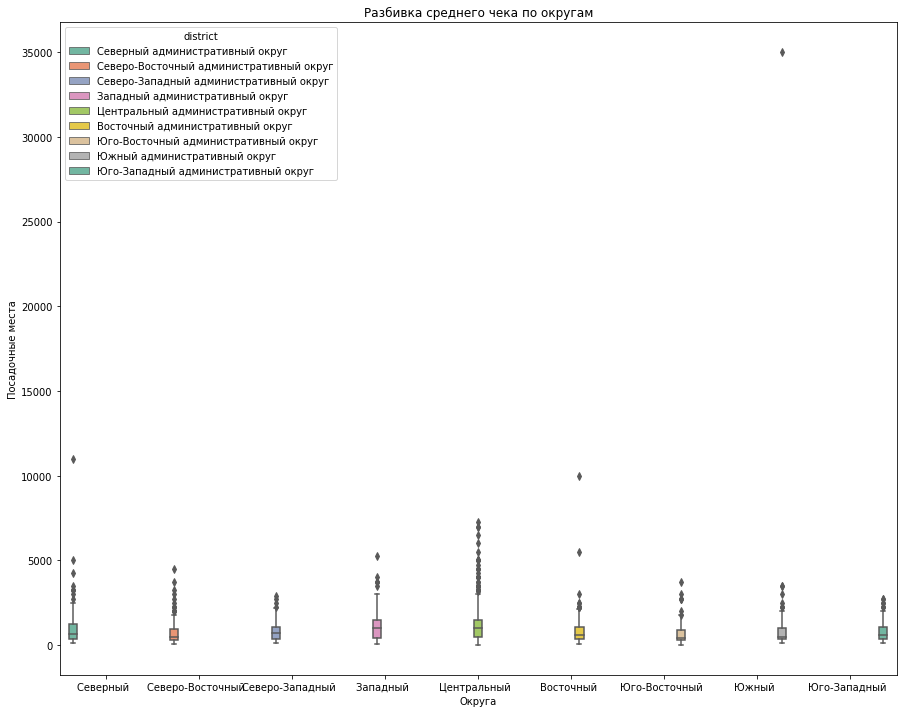

In [158]:
import seaborn as sns

plt.figure(figsize=(15, 12))

sns.boxplot(data=df_new, x='district_new', y='middle_avg_bill', hue='district', palette='Set2')
plt.title('Разбивка среднего чека по округам')
plt.xlabel('Округа')
plt.ylabel('Посадочные места')

Наиболее значимые выбросы относятся к САО, ВАО и ЮАО. В ЦАО выбросов больше всего.

In [159]:
pivot_table = pd.pivot_table(df_new,
                             index='district',
                             columns='name',
                             values='middle_avg_bill',
                             aggfunc='mean')


# Вычисление суммы значений по столбцам (названиям)
total_by_name = pivot_table.sum(axis=0)

# Сортировка столбцов по убыванию суммы

pivot_table_sorted = pivot_table[total_by_name.sort_values(ascending=False).index]

# Вывод отсортированной сводной таблицы
pivot_table_sorted.head(15)

name,кафе,андерсон,чойхона,тануки,гости,vasilchukí chaihona №1,хинкальная,поминальные обеды,чайка,чайхона №1,...,kafin,star hit cafe,московские пышки,кафе соляночка,буфет-столовая южный порт,бобс кофе,french bakery,бургер mix,монастырская чайная,шаурмян у арена
district,,,,,,,,,,,,,,,,,,,,,
Восточный административный округ,393.75,1750.000000,NaN,1250.000000,10000.0,NaN,1106.250000,2000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Западный административный округ,600.00,1375.000000,NaN,1416.666667,NaN,1500.0,1750.000000,1625.0,NaN,1750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Северный административный округ,175.00,1750.000000,11000.0,1250.000000,NaN,1500.0,900.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Северо-Восточный административный округ,NaN,1500.000000,NaN,1250.000000,NaN,NaN,NaN,NaN,NaN,1750.0,...,NaN,120.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
Северо-Западный административный округ,NaN,1500.000000,NaN,1125.000000,NaN,1500.0,712.500000,2000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Центральный административный округ,NaN,1166.666667,NaN,1250.000000,NaN,1500.0,1064.285714,NaN,6500.0,2000.0,...,120.0,NaN,120.0,110.0,NaN,NaN,NaN,NaN,67.0,NaN
Юго-Восточный административный округ,260.00,NaN,NaN,1250.000000,NaN,NaN,300.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,107.0,NaN,NaN,90.0,NaN,30.0
Юго-Западный административный округ,350.00,1375.000000,NaN,900.000000,NaN,1500.0,875.000000,2000.0,1100.0,1750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
Южный административный округ,17600.00,1325.000000,NaN,1250.000000,NaN,1500.0,1100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Здесь я попробовал построить сводную таблицу, о которой ты писал в совете. Но что-то не то получилось. Скажи, пожалуйста, что именно тут нужно сделать.

In [160]:
df_new

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,chain_new,district_new
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False,Несетевые,Северный
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False,Несетевые,Северный
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False,Несетевые,Северный
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False,Несетевые,Северный
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False,Сетевые,Северный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False,Несетевые,Юго-Западный
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False,Несетевые,Южный
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True,Несетевые,Юго-Восточный
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True,Сетевые,Юго-Восточный


In [161]:
df_avg_bill = df_new.loc[df_new['middle_avg_bill']<1000]

In [162]:
avg_bill_by_district_cleaned = df_avg_bill.groupby('district')['middle_avg_bill'].mean()

<AxesSubplot:title={'center':'Вариация среднего чека заведения в зависимости от района Москвы'}, ylabel='Район'>

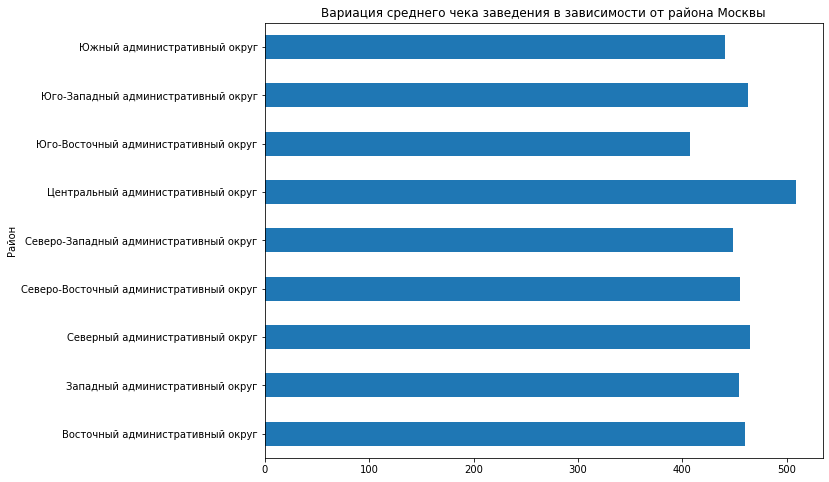

In [163]:
avg_bill_by_district_cleaned.plot(kind='barh', figsize=(10,8), title='Вариация среднего чека заведения в зависимости от района Москвы',
                         xlabel='Район', ylabel='Средний чек, руб.')

Средний чек по административным округам Москвы варьируется в диапазонах от 500 до 600 рублей. Самый высокий он, как и предполагалось, в ЦАО (600 руб.). На втором месте САО и ЗАО - 570 рублей. Самый низкий средний чек в ЮВАО - 500 рублей.

---

### Задача 9

 При необходимости проведите исследования других данных и их взаимосвязи. Например, часы работы заведений или стоимость чашки кофе в зависимости от расположения или типа заведения.


In [164]:
avg_coffee_by_district = df_new.groupby('district')['middle_coffee_cup'].mean()

<AxesSubplot:title={'center':'Cтоимость чашки кофе в зависимости от расположения'}, ylabel='Регион'>

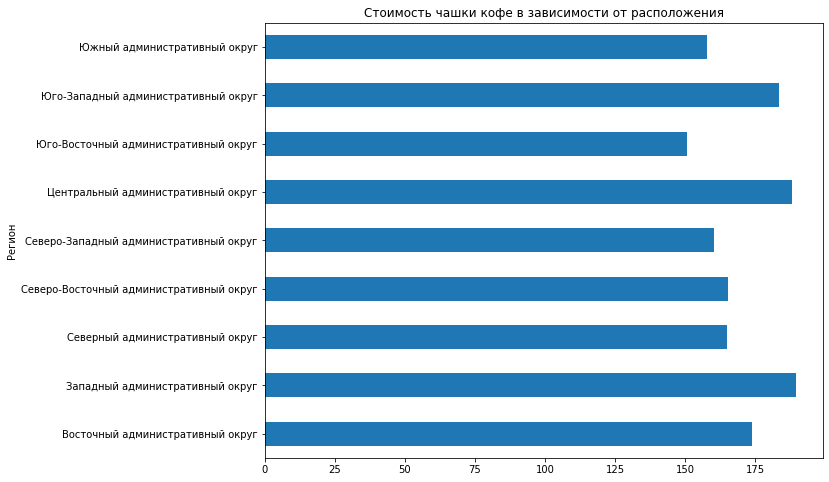

In [165]:
avg_coffee_by_district.plot(kind='barh', figsize=(10,8), title='Cтоимость чашки кофе в зависимости от расположения',
                           xlabel='Регион', ylabel='Средняя стоимость чашки кофе, руб.')

По данным стоимости чашки кофе в зависимости от расположения распределение уже более плавное (от 150 до 200 рублей). Хотя, как мы помним из предобработки данных, в этом столбце было очень много пропусков (порядка 90%). Поэтому подобный показетель не особо релевантен в исследовании. Тем не менее, самый дорогой кофе в ЦАО, ЗАО и ЮЗАО - 200 рублей. А самый дешевый в ЮВАО - 150 рублей.

In [166]:
places_24_7 = df_new.groupby('district')['is_24_7'].sum()

<AxesSubplot:title={'center':'Распределение круглосуточных заведений по регионам'}, ylabel='Регион'>

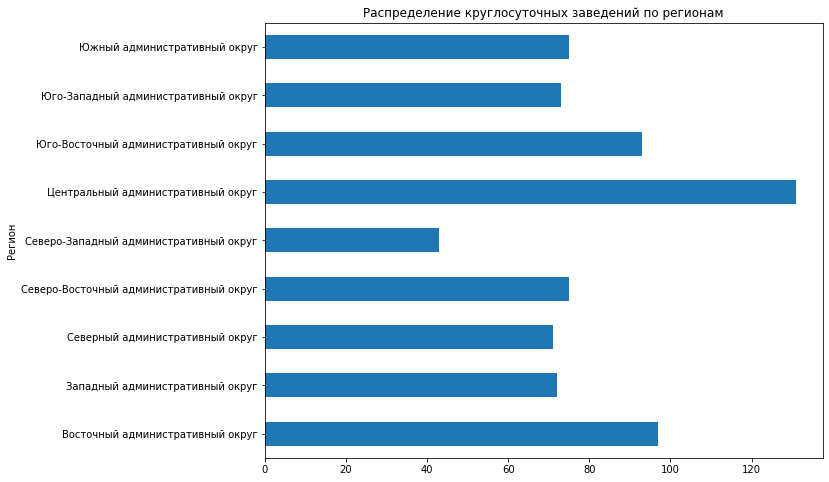

In [167]:
places_24_7.plot(kind='barh', figsize=(10,8), title='Распределение круглосуточных заведений по регионам',
                           xlabel='Регион', ylabel='Количество круглосуточных заведений')

Количество круглосуточных заведений по регионам варьируется от 50 до 150. Наибольшее количество такивых заведений - в ЦАО (150). Второе место делят ЮВАО и ВАО - по 100 мест. Наименьшее число круглосуточных заведений в СЗАО - 50.

P.S. Постараюсь учесть твои советы и провести анализ после того как сдам проект.

In [168]:
df_new_pizza=df_new.loc[df_new['category']=='пиццерия']

In [169]:
pizza_by_district = df_new_pizza.groupby('district')['id'].count()

<AxesSubplot:title={'center':'Распределение пиццерий по регионам'}, ylabel='Регион'>

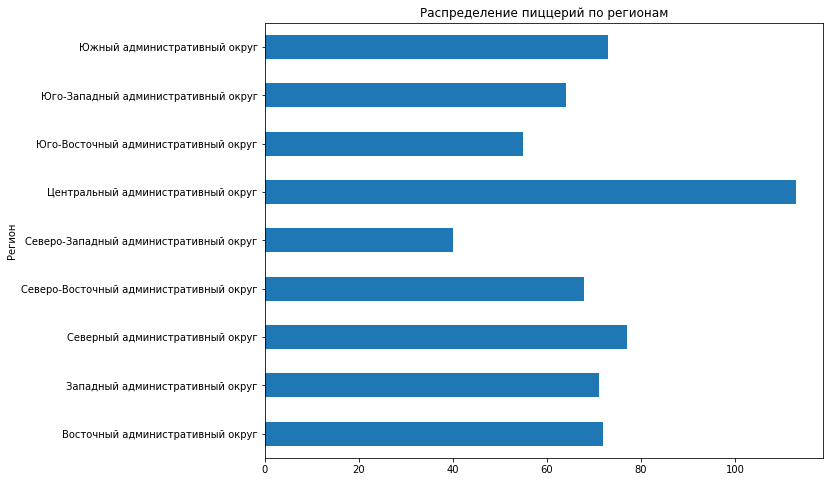

In [170]:
pizza_by_district.plot(kind='barh', figsize=(10,8), title='Распределение пиццерий по регионам',
                           xlabel='Регион', ylabel='Количество пиццерий')

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

1) Самые популярные категории - кафе и рестораны, наименее популярные - столовые и булочные.


2) Самый популярный округ по количеству заведений - ЦАО, наименее популярный - СЗАО.


3) Распределение несетевых заведений по категориям гораздо больше. За исключением пиццерий и кофейн, где эти соотношения примерно равны, но доля сетевых чуть больше и в булочных, где доля сетевых значительно выше.


4) Большая часть заведений располагает посадочными местами в диапазоне от 50 до 100 мест, а основная часть варьируется в промежутке от 0 до 300 посадочных мест.


5) В целом рейтинги внутри категорий варьируются в не особо больших амплитудах - от 4 до 4,4. Самый высокий рейтинг у баров. Самый низкий у заведений быстрого питания и у кафе.


6) В целом наблюдается довольно низкая корреляция между рейтингами и прочими рассмотренными категориями.


7) Среди топ-15 самых популярных сетевых заведений самое популярное - Шоколадница. В целом большинство мест из списка относятся к категориям кофейн или ресторанов. Рейтинг топ-15 сетевых заведений варьируется в значениях от 3,9 до примерно 4,4. 


8) Средний чек по административным округам Москвы варьируется в диапазонах от 500 до 700 рублей. Самый высокий он в ЦАО. Самый низкий средний чек в ЮВАО.


9) Количество круглосуточных заведений по регионам варьируется от 50 до 150. Наибольшее количество их - в ЦАО. Наименьшее - в СЗАО.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

I) Общий обзор проделанной работы.

Был проведен исследовательский анализ рынка заведений общественного питания Москвы. 

Для этого были проделаны следующие шаги:

1) Были проверены данные на корректность и были объединены 2 датасета;

2) Проведена предобработотка данных: обнаружены и предобработаны пропуски, сделаны корректными типы данных, проверены данные на явные и неявные дубликаты.

Все пропуски было решено оставить как есть.


В ходе поисков дубликатов было найдено 4 неявных дубликатов по адресу и названию. Это чуть меньше 0,05% от всего массива данных. Также были заменены пропуски в столбцах "middle_avg_bill" и "hours" на медианные значения. Данные в столбце "chain" были приведены к менее массивным данным. А в столбце 'seats' - к целочисленным данным.

Также был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.

3) Был проведен исследовательский анализ данных:

Исследовано количество объектов по каждой категории. 

Исследовано распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

Изучено соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

Исследовано количество посадочных мест в заведениях.

Исследован рейтинг заведений.

Построена матрица корреляции рейтинга заведения с разными данными и выявлено, какие из этих данных наибольшим образом влияют на рейтинг.

Найдено топ-15 популярных сетей в Москве.

Изучена вариация среднего чека заведения в зависимости от района Москвы.

II) Ответы на исследовательские вопросы, или главные выводы.

1) В Москве больше всего кафе и ресторанов. И того и другого более 2000. Меньше всего столовых и булочных. Их меньше 500 на каждую категорию. На третьем месте по популярности выделяются кофейни. Их чуть менее 1500 штук.

2) По количеству объектов общественного питания по округам явно лидирует Центральный. Там их более 2000. Значительно меньше в сравнении с остальными округами количество заведений в Северо-западном округе. Их там около 500. Распределение по остальным округам достаточно равномерное и находится в пределах от 750 до 1000.

3) Самая популярная категория в ЦАО - рестораны. Их здесь более 650. Меньше всего здесь булочных и столовых - около 50 на каждую категорию. Заведений быстрого питания и пиццерий тоже немного - около 100 на каждую категорию. Количество заведений по остальным категориям в ЦАО варьируются от 350 до 450 штук внутри каждой категории.

4) Распределение несетевых заведений по категориям гораздо больше. За исключением пиццерий и кофейн, где эти соотношения примерно равны, но доля сетевых чуть больше и в булочных, где доля сетевых значительно выше.

5) Видно крайне неравномерное распределение сидячих мест по ресторанам и сильное смещение в область с низкими значениями. Большая часть заведений располагает посадочными местами в диапазоне от 50 до 100 мест, а основная часть варьируется в промежутке от 0 до 300 посадочных мест. Также в выборке очень много выбросов с высокими значениями. Самый высокий из которых имеет значение более 1300.

6) По распределению посадочных мест по категориям видна довольно ровная картина. Больше всего посадочных мест у баров - более 120, примерно столько же у ресторанов. Меньше всего у булочных и пиццерий - порядка 90 на каждую категорию.

7) В целом рейтинги внутри категорий варьируются в не особо больших амплитудах - от примерно 4,05 до примерно 4,38. Самый высокий рейтинг у баров - 4,38. Это логично, ведь там люди выпивают и в хорошем расположении духа охотнее ставят заведению высокую оценку. Самый низкий у заведений быстрого питания (4,05) и у кафе (4,12). Что тоже логично, ведь подобные заведения относятся к более дешевым и, следовательно, их качество значительно уступает. Людям свойственно критическое отношение несмотря на желание сэкономить. У остальных категорий заведений рейтинг примерно одинаковый и варьируется в пределах от 4,22 до 4,3.

8) В целом наблюдается довольно низкая взаимосвязь между рейтингами и прочими рассмотренными категориями (категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным). Наибольшую зависимость рейтинга показывают такие параметры как категория цены, район и категория заведения (коэффициент корреляции - от 0,19 до 0,22). Наименьшую - количество посадочных мест. Здесь коэффициент корреляции близок к нулю.

9) Среди топ-15 самых популярных сетевых заведений самое популярное - Шоколадница, относящееся к категории кофейня. Число таких заведений сильно лидирует на фоне остальных. Их в Москве чуть меньше 120. Тогда как второе заведение в списке топ-15 - пиццерия "Домино'с пицца" насчитывает менее 80 мест. В целом большинство мест из списка относятся к категориям кофейн или ресторанов. Присутствует пара пиццерий, 3 кафе и одна булочная.

10) Рейтинг топ-15 сетевых заведений варьируется в значениях от 3,9 до примерно 4,4. Явный лидер здесь как и в количестве заведений - Кофемания (4,4). Также более высокие рейтинги на фоне остальных показывают булочная "Буханка" и кафе "Кулинарная лавка братьев Караваевых" (тоже примерно 4,4). Самые низкие рейтинг у кафе Чайхана" (4) и у ресторана "Яндекс лавка" (3,9) (кстати, странно, что "Яндекс лавка" попала в категорию ресторанов, когда логичнее было бы ее отнести к заведениям быстрого питания).

11) Средний чек по административным округам Москвы варьируется в диапазонах от 500 до 700 рублей. Самый высокий он, как и предполагалось, в ЦАО (700 руб.). Самый низкий средний чек в ЮВАО - 500 рублей.

12) По данным стоимости чашки кофе в зависимости от расположения распределение уже более плавное (от 150 до 200 рублей). Хотя, как мы помним из предобработки данных, в этом столбце было очень много пропусков (порядка 90%). Поэтому подобный показетель не особо релевантен в исследовании. Тем не менее, самый дорогой кофе в ЦАО, ЗАО и ЮЗАО - 200 рублей. А самый дешевый в ЮВАО - 150 рублей.

13) Количество круглосуточных заведений по регионам варьируется от 50 до 150. Наибольшее количество таковых заведений - в ЦАО (150). Второе место делят ЮВАО и ВАО - по 100 мест. Наименьшее число круглосуточных заведений в СЗАО - 50.

III) Рекомендации на основе анализа данных.

1) Категория заведения. Судя по анализу самые популярные заведения - рестораны и кафе. То есть их уже довольно много, и в этой категории может быть большая конкуренция. В свою очередь баров довольно мало. У этой категории в среднем самый высокий рейтинг. В этой категории мало сетевых точек, а значит здесь ниже мнополия. Так что на основе проделанного анализа будет рекомендация - октрывать заведение в категории бар.


2) Местоположение. Наименьшее количество заведений расположено в СЗАО. Соответвенно, там меньше конкуренция. Так же средний чек там не слишком высок и не слишком низок. Можно будет "прощупать" свою аудиторию на будущую платежеспособность. К тому же СЗАО считается довольно благополучным округом Москвы. В анализе не было множества данных вроде стоимости аренды помещений, средней заработной платы по округам и прочих факторов, которые также могут повляить на финальное решение. Но на основе имеющийся информации рекомендовано разместить новое заведение в СЗАО.


3) Цены. Как видно из анализа средний чек в целом по заведениям невысок и находится в не слишком больших расзбросах по округам. Рекомендовано на первых порах сделать чек в заведении ниже среднего.


4) Количество сидячих мест. Большая часть заведений в выборке располагает посадочными местами в диапазоне от 50 до 100 мест. Рекомнедовано придерживаться данных величин либо меньше.